In [62]:
import scanpy as sc
import muon as mu
import matplotlib.pyplot as plt

In [63]:
adata = sc.read_h5ad("../results/annotation/cite_BMMC_test_500batchsize64/adata_prediction.h5ad")
adata

AnnData object with n_obs × n_vars = 9611 × 64
    obs: 'rna:GEX_n_genes_by_counts', 'rna:GEX_pct_counts_mt', 'rna:GEX_size_factors', 'rna:GEX_phase', 'rna:ADT_n_antibodies_by_counts', 'rna:ADT_total_counts', 'rna:ADT_iso_count', 'rna:cell_type', 'rna:batch', 'rna:ADT_pseudotime_order', 'rna:GEX_pseudotime_order', 'rna:Samplename', 'rna:Site', 'rna:DonorNumber', 'rna:Modality', 'rna:VendorLot', 'rna:DonorID', 'rna:DonorAge', 'rna:DonorBMI', 'rna:DonorBloodType', 'rna:DonorRace', 'rna:Ethnicity', 'rna:DonorGender', 'rna:QCMeds', 'rna:DonorSmoker', 'rna:is_train', 'adt:GEX_n_genes_by_counts', 'adt:GEX_pct_counts_mt', 'adt:GEX_size_factors', 'adt:GEX_phase', 'adt:ADT_n_antibodies_by_counts', 'adt:ADT_total_counts', 'adt:ADT_iso_count', 'adt:cell_type', 'adt:batch', 'adt:ADT_pseudotime_order', 'adt:GEX_pseudotime_order', 'adt:Samplename', 'adt:Site', 'adt:DonorNumber', 'adt:Modality', 'adt:VendorLot', 'adt:DonorID', 'adt:DonorAge', 'adt:DonorBMI', 'adt:DonorBloodType', 'adt:DonorRace', 'ad

In [64]:
metric, use_rep, n_neighbors = "cosine", "X", 15
sc.pp.neighbors(adata, metric=metric, use_rep=use_rep, n_neighbors=n_neighbors)
sc.tl.umap(adata, min_dist=0.4, spread=1.0)
# sc.tl.leiden(adata, resolution=resolution, flavor="igraph", n_iterations=2)

In [65]:
train_adata = adata[adata.obs['batch'].isin(['s4d9'])].copy()
train_adata

AnnData object with n_obs × n_vars = 4178 × 64
    obs: 'rna:GEX_n_genes_by_counts', 'rna:GEX_pct_counts_mt', 'rna:GEX_size_factors', 'rna:GEX_phase', 'rna:ADT_n_antibodies_by_counts', 'rna:ADT_total_counts', 'rna:ADT_iso_count', 'rna:cell_type', 'rna:batch', 'rna:ADT_pseudotime_order', 'rna:GEX_pseudotime_order', 'rna:Samplename', 'rna:Site', 'rna:DonorNumber', 'rna:Modality', 'rna:VendorLot', 'rna:DonorID', 'rna:DonorAge', 'rna:DonorBMI', 'rna:DonorBloodType', 'rna:DonorRace', 'rna:Ethnicity', 'rna:DonorGender', 'rna:QCMeds', 'rna:DonorSmoker', 'rna:is_train', 'adt:GEX_n_genes_by_counts', 'adt:GEX_pct_counts_mt', 'adt:GEX_size_factors', 'adt:GEX_phase', 'adt:ADT_n_antibodies_by_counts', 'adt:ADT_total_counts', 'adt:ADT_iso_count', 'adt:cell_type', 'adt:batch', 'adt:ADT_pseudotime_order', 'adt:GEX_pseudotime_order', 'adt:Samplename', 'adt:Site', 'adt:DonorNumber', 'adt:Modality', 'adt:VendorLot', 'adt:DonorID', 'adt:DonorAge', 'adt:DonorBMI', 'adt:DonorBloodType', 'adt:DonorRace', 'ad

In [66]:
test_adata = adata[~adata.obs['batch'].isin(['s4d9'])].copy()
test_adata

AnnData object with n_obs × n_vars = 5433 × 64
    obs: 'rna:GEX_n_genes_by_counts', 'rna:GEX_pct_counts_mt', 'rna:GEX_size_factors', 'rna:GEX_phase', 'rna:ADT_n_antibodies_by_counts', 'rna:ADT_total_counts', 'rna:ADT_iso_count', 'rna:cell_type', 'rna:batch', 'rna:ADT_pseudotime_order', 'rna:GEX_pseudotime_order', 'rna:Samplename', 'rna:Site', 'rna:DonorNumber', 'rna:Modality', 'rna:VendorLot', 'rna:DonorID', 'rna:DonorAge', 'rna:DonorBMI', 'rna:DonorBloodType', 'rna:DonorRace', 'rna:Ethnicity', 'rna:DonorGender', 'rna:QCMeds', 'rna:DonorSmoker', 'rna:is_train', 'adt:GEX_n_genes_by_counts', 'adt:GEX_pct_counts_mt', 'adt:GEX_size_factors', 'adt:GEX_phase', 'adt:ADT_n_antibodies_by_counts', 'adt:ADT_total_counts', 'adt:ADT_iso_count', 'adt:cell_type', 'adt:batch', 'adt:ADT_pseudotime_order', 'adt:GEX_pseudotime_order', 'adt:Samplename', 'adt:Site', 'adt:DonorNumber', 'adt:Modality', 'adt:VendorLot', 'adt:DonorID', 'adt:DonorAge', 'adt:DonorBMI', 'adt:DonorBloodType', 'adt:DonorRace', 'ad

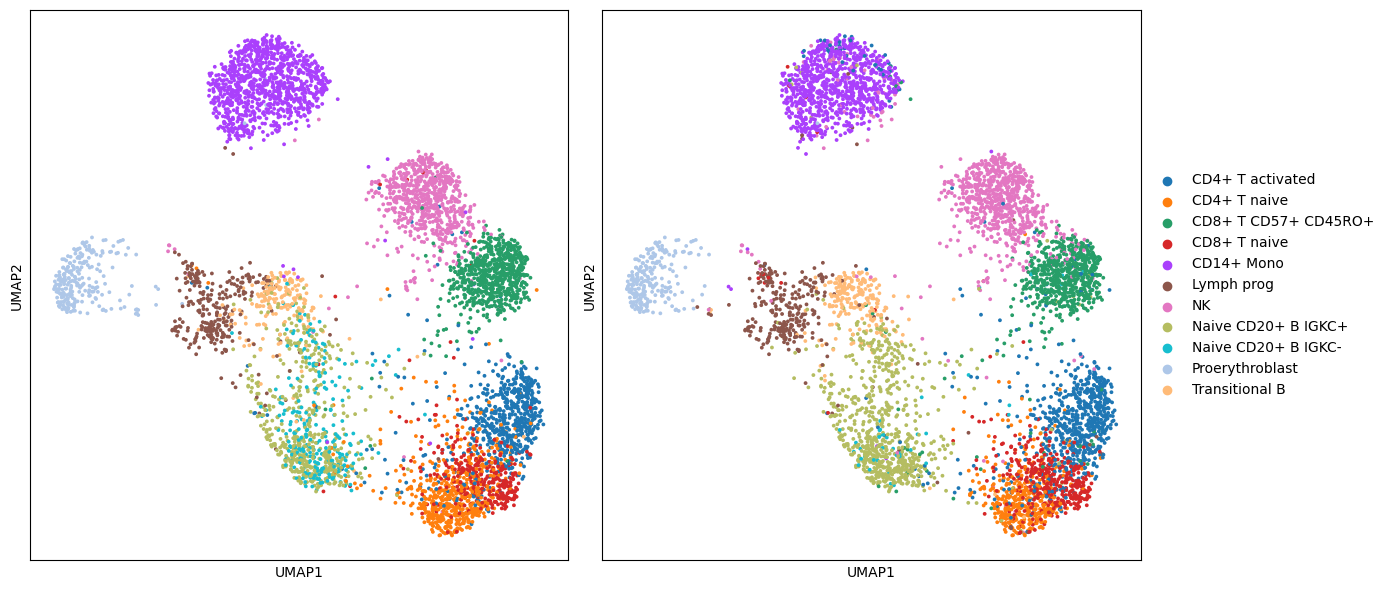

In [42]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))

# 在第一个子图中绘制 train_adata 的 UMAP
sc.pl.umap(test_adata, color=['cell_type'], ax=axs[0], show=False, legend_loc=None, size=30)
axs[0].set_title('')

# 在第二个子图中绘制 test_adata 的 UMAP
sc.pl.umap(test_adata, color=['cell_type_prediction'], ax=axs[1], show=False, size=30)
axs[1].set_title('')

plt.tight_layout()
plt.show()


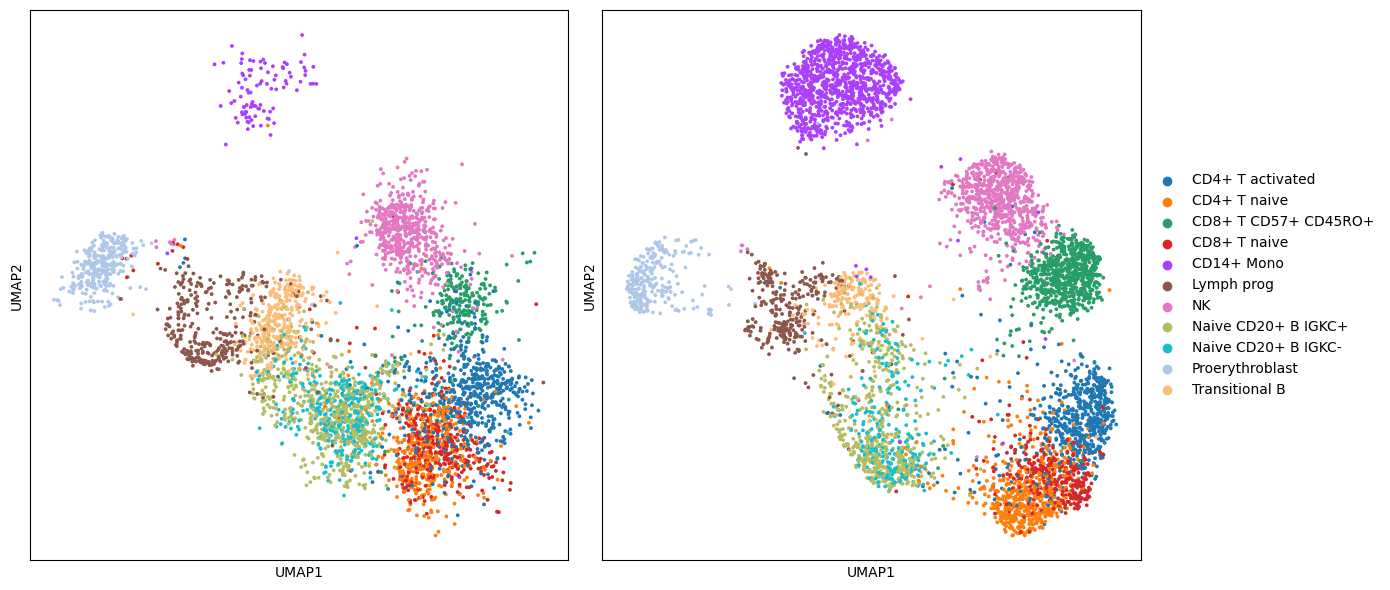

In [43]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))

# 在第一个子图中绘制 train_adata 的 UMAP
sc.pl.umap(train_adata, color=['cell_type'], ax=axs[0], show=False, legend_loc=None, size=30)
axs[0].set_title('')

# 在第二个子图中绘制 test_adata 的 UMAP
sc.pl.umap(test_adata, color=['cell_type'], ax=axs[1], show=False, size=30)
axs[1].set_title('')

plt.tight_layout()
plt.show()


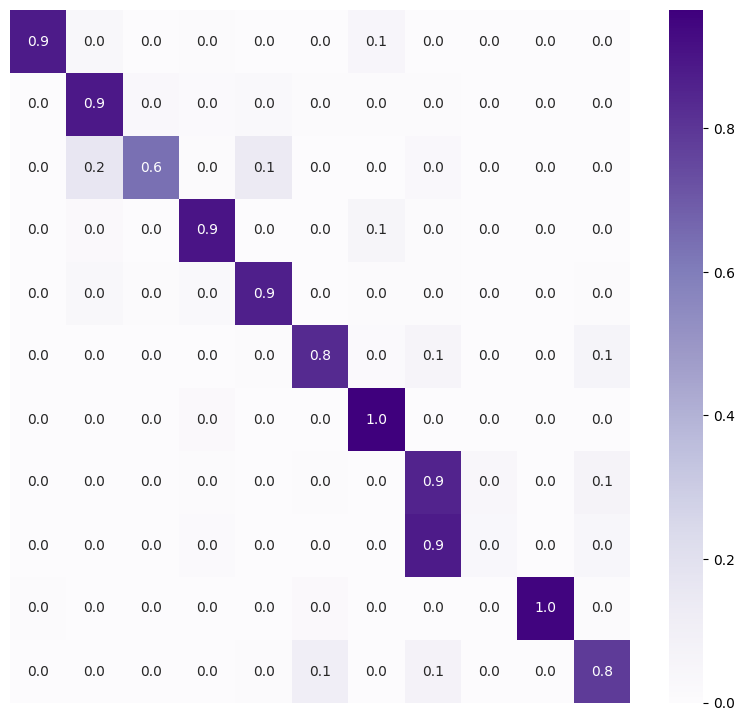

In [79]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


fig, ax = plt.subplots(1, 1, figsize=(10, 9))
# 生成混淆矩阵
cm = confusion_matrix(
    test_adata.obs['cell_type'].values, 
    test_adata.obs['cell_type_prediction'].values, 
    labels=np.unique(test_adata.obs['cell_type'].values)
)
cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
# cm = pd.DataFrame(cm, index=celltypes[:cm.shape[0]], columns=celltypes[:cm.shape[1]]))
sns.heatmap(
    cm, annot=True, fmt=".1f", 
    cmap="Purples",  # Blues
    ax=ax
)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("results/annotation/confusion_matrix.pdf", dpi=300)

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

# 假设数据已经加载到 AnnData 对象中，命名为 `adata`
# `adata` 的 .X 是细胞嵌入（如 PCA 或其他降维结果）
# `adata.obs['cell_type']` 包含细胞类型

# 按细胞类型排序（确保热图分类清晰）
sc.pp.neighbors(adata)
sc.tl.dendrogram(adata, groupby='cell_type')

# 使用 Scanpy 绘制热图
sc.pl.heatmap(
    adata,
    var_names=adata.var_names,  # 使用全部基因（或变量）
    groupby='cell_type',        # 按细胞类型分组
    cmap='RdYlBu_r',            # 使用类似的颜色映射
    standard_scale='var',       # 对基因（列）标准化
    dendrogram=True,            # 在顶部显示层级聚类树
    swap_axes=False,            # 保持默认轴顺序
    show_gene_labels=False,     # 隐藏基因标签
    figsize=(10, 8),            # 设置热图尺寸
    colorbar_title="Expression"
)

# 如果需要调整标题，可以用 Matplotlib 进一步修改
plt.title("Heatmap of cell emb", fontsize=14)
plt.tight_layout()
plt.show()


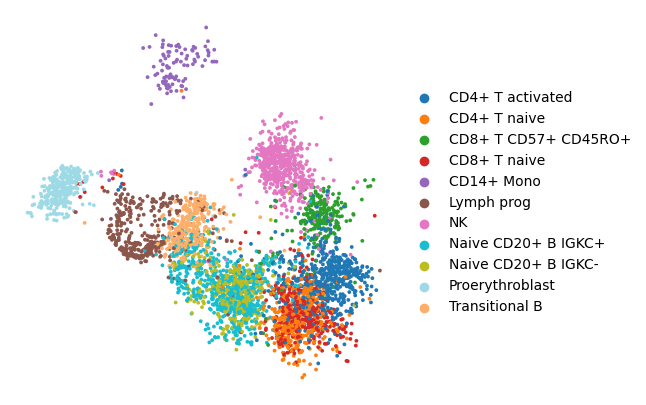

In [57]:
import os
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
color_dict = {
    "CD4+ T activated": "#1f77b4",  # 蓝
    "CD4+ T naive": "#ff7f0e",      # 橙
    "CD8+ T CD57+ CD45RO+": "#2ca02c",  # 绿
    "CD8+ T naive": "#d62728",      # 红
    "CD14+ Mono": "#9467bd",        # 紫
    "Lymph prog": "#8c564b",        # 棕
    "NK": "#e377c2",                # 粉
    "Naive CD20+ B IGKC+": "#17becf",  # 浅青
    "Naive CD20+ B IGKC-": "#bcbd22",  # 黄绿
    "Proerythroblast": "#9edae5",   # 浅蓝
    "Transitional B": "#fdae6b",    # 浅橙
}
sc.pl.umap(
    train_adata, 
    color="cell_type", 
    colorbar_loc=None,
    ax=ax, 
    show=False, 
    palette=color_dict,
    # legend_loc=None,
    size=30
)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title("", fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add thick border
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color
    spine.set_linewidth(1.5)  # Set border thickness
fig.show()
fig.savefig(os.path.join("results/annotation", f"cite_BMMC_s4_reference.pdf"), bbox_inches='tight'
            # dpi=600, transparent=True
)

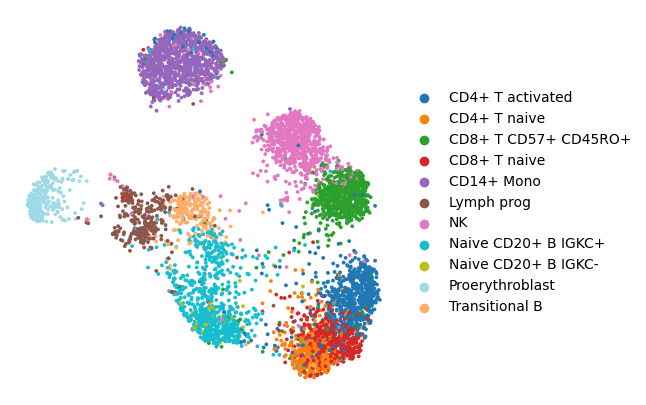

In [56]:
import os
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sc.pl.umap(
    test_adata, 
    color="cell_type_prediction", 
    colorbar_loc=None,
    ax=ax, 
    show=False, 
    palette=color_dict,
    # legend_loc=None,
    # legend_fontsize=None,
    size=30
)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title("", fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add thick border
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color
    spine.set_linewidth(1.5)  # Set border thickness
fig.show()
fig.savefig(os.path.join("results/annotation", f"cite_BMMC_s4_query_prediction.pdf"),
            # dpi=600, transparent=True
)